### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [79]:
data = pd.read_csv('data/coupons.csv')

In [122]:
data.head()
# data.dtypes

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [113]:
#check types
data.income.unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

3. Decide what to do about your missing data -- drop, replace, other...

In [114]:
# data = data.dropna()
data.RestaurantLessThan20.unique()

array(['4~8', '1~3', 'less1', 'gt8', nan, 'never'], dtype=object)

4. What proportion of the total observations chose to accept the coupon? 



In [87]:
data['Y'].value_counts()
print('7210 out of 12684 accepted coupon')

7210 out of 12684 accepted coupon


5. Use a bar plot to visualize the `coupon` column.

<AxesSubplot:xlabel='index', ylabel='coupon'>

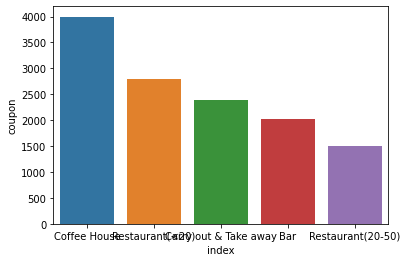

In [88]:
# sns.barplot(data, y='coupon')
counts = data.coupon.value_counts().reset_index()
sns.barplot(x=counts['index'], y=counts['coupon'])

6. Use a histogram to visualize the temperature column.

<AxesSubplot:xlabel='temperature', ylabel='Count'>

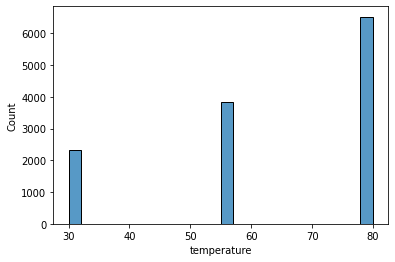

In [89]:
sns.histplot(data['temperature'])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [90]:
bar = data[data.coupon == 'Bar']

2. What proportion of bar coupons were accepted?


In [92]:
bar['Y'].value_counts()
print('827 of 2017 were accepted')

827 of 2017 were accepted


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [99]:
# bar['Bar'].unique()
bar['less3'] = ~bar['Bar'].isin(['gt8','4~8'])
bar.groupby(['less3'])['Y'].value_counts(normalize=True)

print('If less than 3, then 0.768844 people took the coupon')
print('If more than 3, then 0.370737 people took the coupon')

If less than 3, then 0.768844 people took the coupon
If more than 3, then 0.370737 people took the coupon


/Users/nikhilgahlot/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [102]:
bar['group'] = bar['Bar'].isin(['gt8','4~8', '1~3']) & ~bar['age'].isin(['21', 'below21'])

bar.groupby(['group'])['Y'].value_counts(normalize=True)

print('Yes there is a idfference. If in the group then 0.695238 take coupon. If not in group then 0.335003 take coupon')
# print('If more than 3, then 1/11 people took the coupon')

Yes there is a idfference. If in the group then 0.695238 take coupon. If not in group then 0.335003 take coupon


/Users/nikhilgahlot/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [108]:
bar['group'] = bar['Bar'].isin(['gt8','4~8', '1~3']) & ~bar['passanger'].isin(['Kid(s)']) & ~bar['occupation'].isin(['Farming Fishing & Forestry'])
bar.groupby(['group'])['Y'].value_counts(normalize=True)

# print('Yes there is a dfference. If in the group then 0.713249 take coupon.')

/Users/nikhilgahlot/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


group  Y
False  0    0.703956
       1    0.296044
True   1    0.713249
       0    0.286751
Name: Y, dtype: float64

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [119]:
bar['group1'] = bar['Bar'].isin(['gt8','4~8', '1~3']) & ~bar['passanger'].isin(['Kid(s)']) & ~bar['passanger'].isin(['Kids(s)']) & (bar['maritalStatus'] != 'Winowed')
bar['group2'] = bar['Bar'].isin(['gt8','4~8', '1~3']) & bar['age'].isin(['below21', '21', '26'])
bar['group3'] = bar['RestaurantLessThan20'].isin(['4~8', 'gt8']) & ~bar['income'].isin(['$37500 - $49999'])

# print(bar.groupby(['group1'])['Y'].value_counts(normalize=True))
# print(bar.groupby(['group2'])['Y'].value_counts(normalize=True))
# print(bar.groupby(['group3'])['Y'].value_counts(normalize=True))

print('the first two groups have similar acceptance rates, the last one has the least')

the first two groups have similar acceptance rates, the last one has the least


/Users/nikhilgahlot/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/nikhilgahlot/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/nikhilgahlot/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [121]:
print('drivers who do not go to the bar alot tend to accept the coupons, or drivers who go with friends')

drivers who do not go to the bar alot tend to accept the coupons, or drivers who go with friends


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [125]:
coffee = data[data.coupon == 'Coffee House']
coffee

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [133]:
coffee.groupby(['Y']).agg({'toCoupon_GEQ5min': ['mean'], 'toCoupon_GEQ15min':['mean'], 'toCoupon_GEQ25min':['mean']})

,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min
,mean,mean,mean
Y,,,
0,1,0.565717,0.101449
1,1,0.471679,0.053634


In [134]:
print('The distance of the coffee shop does not have a large affect on coupon usage')

The distance of the coffee shop does not have a large affect on coupon usage
